# ADP

## Hierarchical Clustering
***

In [161]:
from sklearn import datasets
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
iris = datasets.load_iris()

In [26]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
labels = pd.DataFrame(iris.target, columns = ['labels'])

In [40]:
df = pd.concat([data, labels], axis = 1)

- 최단연결법 = single
- 최장연결법 = complete
- 평균연결법 = average
- 와드연결법 = ward

### 와드 연결법

In [78]:
linked = linkage(df, 'ward')

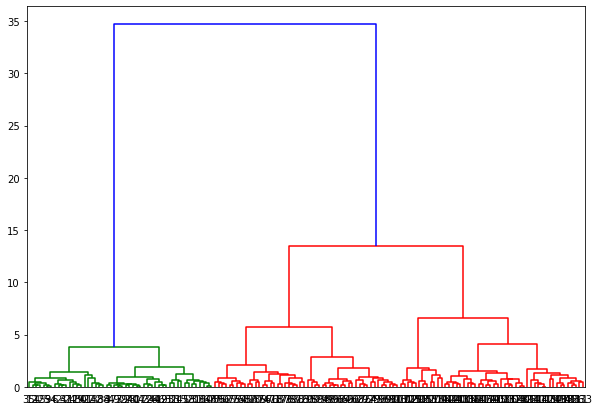

In [79]:
plt.figure(figsize=(10, 7))
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.show()

In [80]:
cut_tree = fcluster(linked, t = 3, criterion = 'distance')

In [81]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'labels' : iris.target})

In [82]:
pd.crosstab(cut_tree_df.pred, cut_tree_df.labels)

labels,0,1,2
pred,,,
1,21,0,0
2,29,0,0
3,0,25,0
4,0,25,0
5,0,0,12
6,0,0,22
7,0,0,16


### 최단 연결법

In [73]:
linked = linkage(df, 'single')

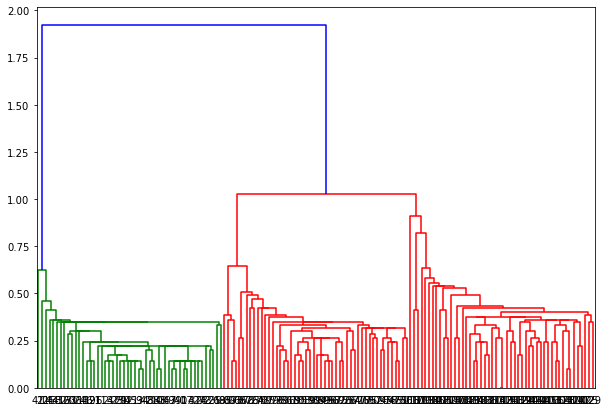

In [74]:
plt.figure(figsize=(10, 7))
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.show()

In [75]:
cut_tree = fcluster(linked, t = 3, criterion = 'distance')

In [76]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'labels' : iris.target})

In [77]:
pd.crosstab(cut_tree_df.pred, cut_tree_df.labels)

labels,0,1,2
pred,,,
1,50,50,50


### 최장 연결법

In [68]:
linked = linkage(df, 'complete')

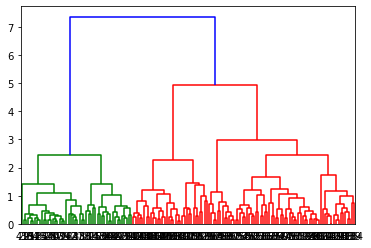

In [69]:
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.show()

In [70]:
cut_tree = fcluster(linked, t = 3, criterion = 'distance')

In [71]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'labels' : iris.target})

In [72]:
pd.crosstab(cut_tree_df.pred, cut_tree_df.labels)

labels,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


### 평균 연결법

In [47]:
linked = linkage(df, 'average')

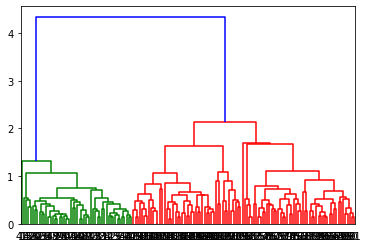

In [48]:
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.show()

In [64]:
cut_tree = fcluster(linked, t = 3, criterion = 'distance')

In [61]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'labels' : iris.target})

In [66]:
pd.crosstab(cut_tree_df.pred, cut_tree_df.labels)

labels,0,1,2
pred,,,
1,50,0,0
2,0,50,50


***

### Practice

Q. 해당 데이터를 활용해 거리를 구하고 최단, 최장, 평균 연결법 실행

In [94]:
df = pd.read_csv("ur.csv") # R의 USArrests 데이터
df.columns = ['Area', 'Murder', 'Assualt', 'UrbanPop', 'Rape']
df = df.set_index('Area')

In [95]:
df.head()

,Murder,Assualt,UrbanPop,Rape
Area,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


#### 코사인

In [107]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [108]:
cos_dis = euclidean_distances(df, df)

In [109]:
l1 = linkage(cos_dis, method = 'complete')

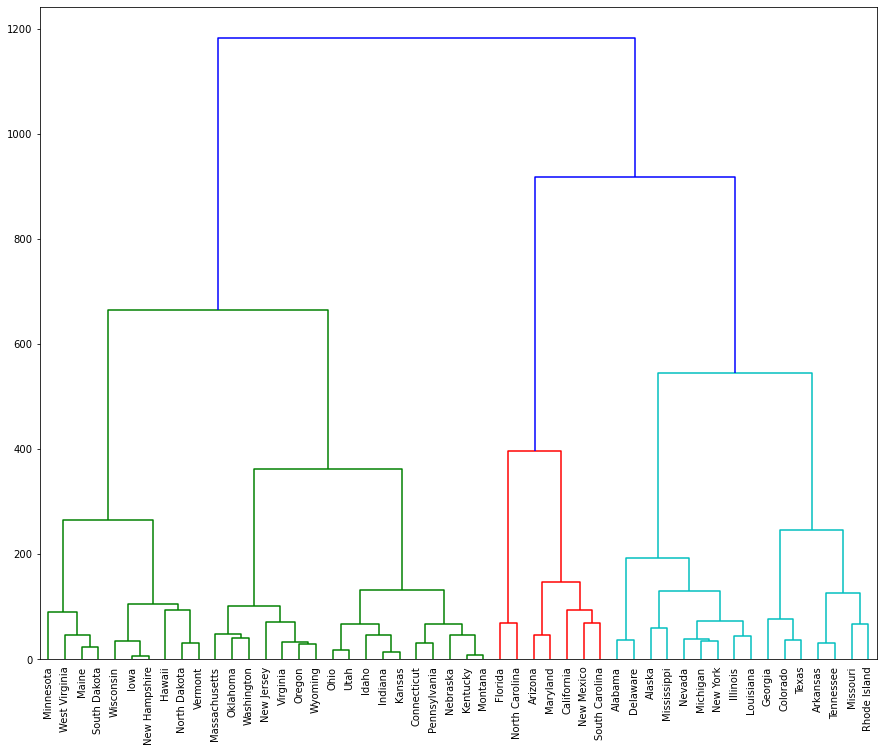

In [112]:
plt.figure(figsize = (15, 12))
dendrogram(l1, leaf_rotation = 90,
           leaf_font_size=10,labels=df.index)
plt.show()

In [113]:
l2 = linkage(cos_dis, method = 'average')

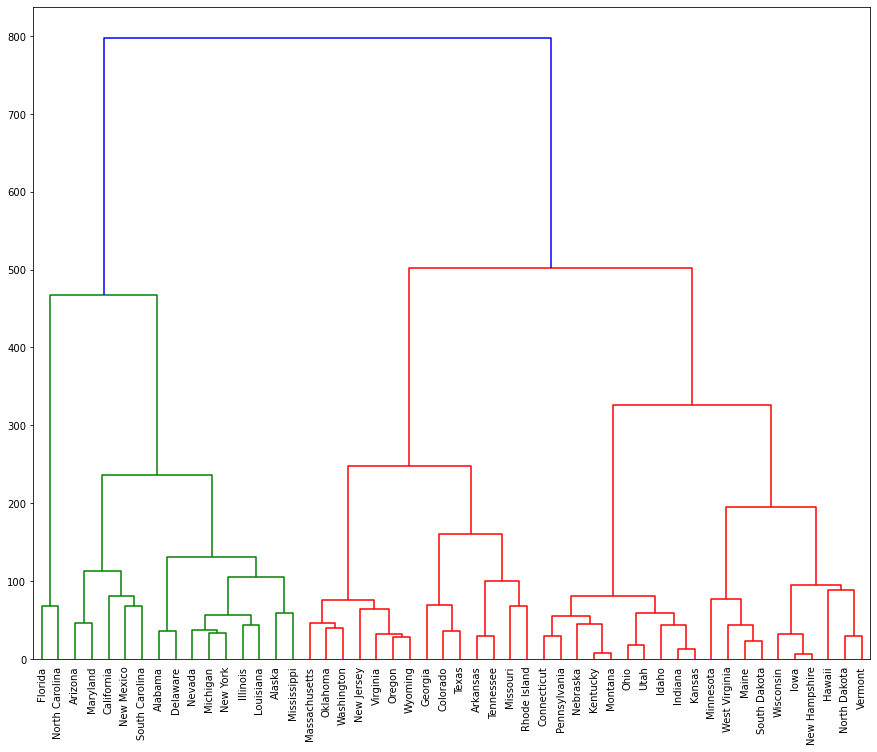

In [114]:
plt.figure(figsize = (15, 12))
dendrogram(l2, leaf_rotation = 90,
           leaf_font_size=10,labels=df.index)
plt.show()

In [115]:
l3 = linkage(cos_dis, method = 'single')

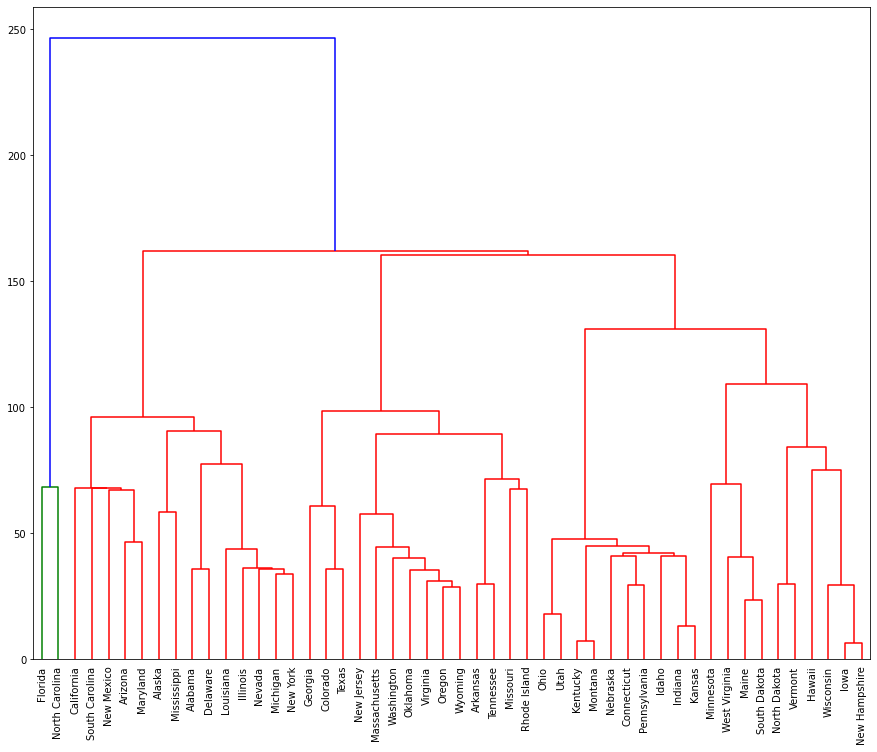

In [132]:
plt.figure(figsize = (15, 12))
dendrogram(l3, leaf_rotation = 90,
           leaf_font_size=10,labels=df.index)
plt.show()

계층 수 정하기

In [118]:
pred = fcluster(l3, t = 120, criterion='distance') # y = 120을 기준으로 clustering

In [137]:
df['labels'] = pred

In [139]:
df.groupby('labels').mean()

,Murder,Assualt,UrbanPop,Rape
labels,,,,
1,14.200000,336.000000,62.500000,24.000000
2,11.471429,263.500000,69.142857,29.000000
3,8.214286,173.285714,70.642857,22.842857
4,5.590000,112.400000,65.600000,17.270000
5,2.950000,62.700000,53.900000,11.510000


***
## K-means Clustering

In [142]:
from sklearn.cluster import KMeans

In [140]:
df = pd.read_csv("C:/Users/ksh/Desktop/나/ADP실기/PART 05 실습용 데이터/credit_final.csv")

In [141]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [155]:
km = KMeans(n_clusters = 2, random_state = 1210).fit(df)

In [148]:
pd.Series(km.labels_).value_counts()

0    827
1    173
dtype: int64

In [156]:
km.inertia_

2405526540.208916

In [149]:
df['cluster_class'] = km.labels_

In [152]:
pd.crosstab(df['credit.rating'], df.cluster_class)

cluster_class,0,1
credit.rating,,
0,228,72
1,599,101


In [153]:
sse = {}
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k).fit(df)
    df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

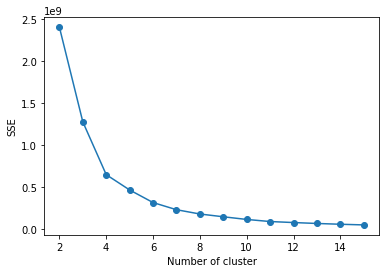

In [154]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker = 'o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [159]:
final_km = KMeans(n_clusters=5).fit(df).predict(df)

In [164]:
df['final_km'] = final_km